In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


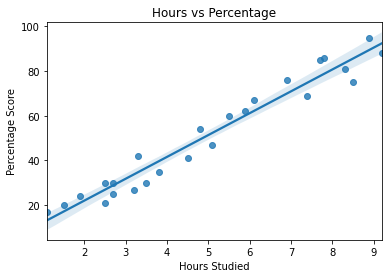

In [3]:
#Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:
# Plotting the distribution of scores
sns.regplot(x='Hours', y='Scores',data=data)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [4]:
#Preparing data
#The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [5]:
#Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
#We'll do this by using Scikit-Learn's built-in train_test_split() method:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
#Training the Algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

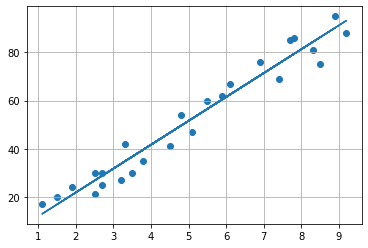

In [7]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.grid(True)
plt.show()

In [8]:
#Making Predictions
#Now that we have trained our algorithm, it's time to make some predictions.

y_pred = regressor.predict(X_test)

In [9]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
#testing with random data
hours = 9.5
own_pred = regressor.predict([[9.5]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.5
Predicted Score = 96.16939660753593


In [11]:
#Evaluating the model
#The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. 
#For simplicity here, we have chosen the mean square error. There are many such metrics.

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred),
     '\nR-square:', 
      metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982 
R-square: 0.9454906892105354


In [ ]:
'''Conclusion
R-square value for this model is 0.94549

Mean absolute error is 4.1838

If a student is studying for 9.5 hours per day than he can score 96.17%'''